# CH274: Computational Assignment No. 1: 
## Stability and Reactivity of polyaromatic hydrocarbons (PAHs)

<div class="alert alert-block alert-info">
In this assignment, we are looking at 20 different PAH molecules. 

You will have to complete 6 tasks where you
* define functions which perform certain operations
* analyse their stability and reactivity and compare their properties

You should use the 'shmo' Huckel calculator that we have defined in Python Video 2.
    
</div>


<div class="alert alert-block alert-danger">
    <b> PLEASE NOTE</b>
    
* **Do not copy this notebook!** Work directly in it.
* **Do not rename this notebook!** If you do, you won't be able to submit it.
* **Do not copy any of the special grading cells.** If you need additioanl cells, create new ones with the + button
* Enter code in prepared code cells. Enter discussion text and answers into prepared text cells (double click the cell)
    
 At the end, you should submit a notebook that:
* is complete
* has functioning code, which can be executed from beginning to end
* x and y axes of the plots should be labeled
* when executed, the notebook generates all the requested data, plots, etc.
* the notebook should make good use of structured code (for-loops, if-statements, etc.)
    
    </div>

## Your dataset
Here are the most important import statements you might need. Don't forget to execute this cell!

In [1]:
from rdkit import Chem
import rdkit.Chem.Draw
from rdkit.Chem import AllChem
from PAH_data import select_molecule, generate_dataset, matprint, mol_with_atom_index, draw_MO, draw_molecule
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import shmo

RDKit WARNING: [16:51:06] Enabling RDKit 2019.09.1 jupyter extensions
[16:51:06] Enabling RDKit 2019.09.1 jupyter extensions


<div class="alert alert-block alert-info">

**ATTENTION** 

The following cell will generate your dataset of molecules. You have to insert your **student id number**. On the basis of this, the function will generate a personalised set of 20 molecules with 24 sp2-hybridised carbon atoms each.
    
Do not change the code in the following cell. Only insert your student ID where it says 
    
        <INSERT ID HERE>
</div>

In [2]:
###PLEASE INSERT YOUR STUDENT ID
#my_student_id =  1234567
my_student_id = 2192510

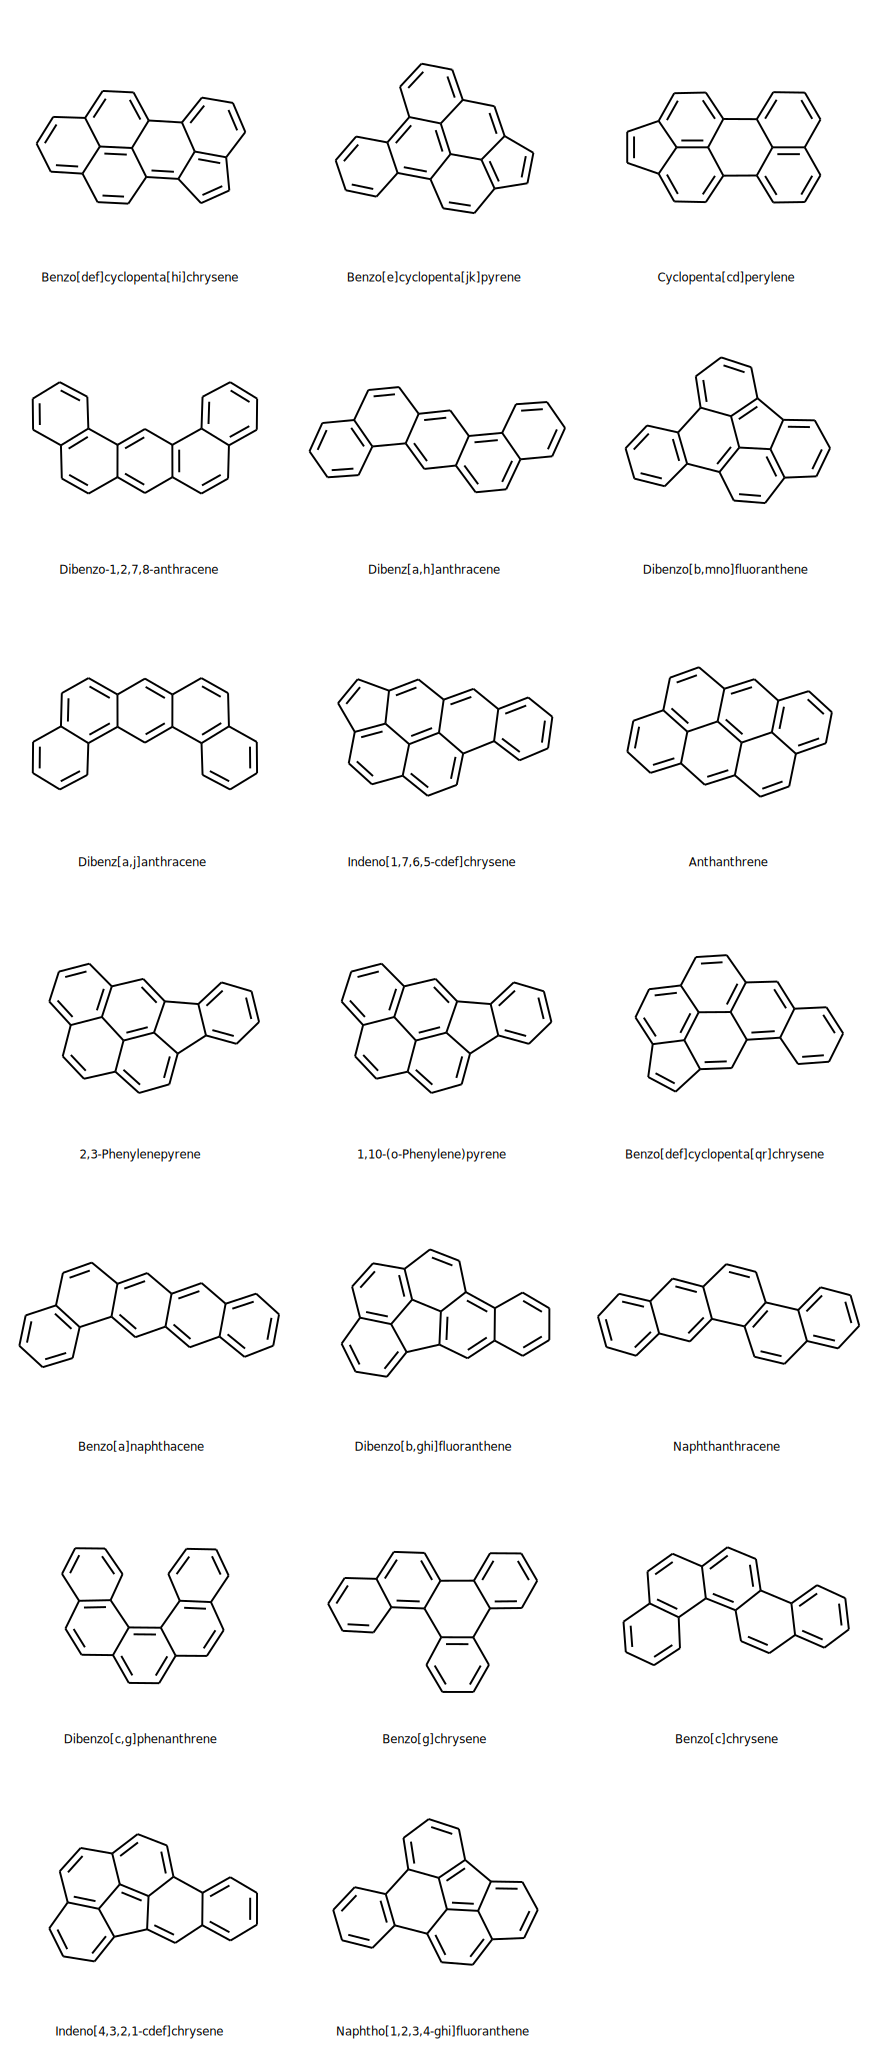

In [3]:
molecule_data, mols, legend = generate_dataset(myid=my_student_id, n_molecules=20, n_carbon_atoms=22)

#Visualises the molecules

draw_molecule(mols, legend=legend)

#Executing this cell will draw your 20 PAH molecules

['Benzo[def]cyclopenta[hi]chrysene', 'Benzo[e]cyclopenta[jk]pyrene', 'Cyclopenta[cd]perylene', 'Dibenzo-1,2,7,8-anthracene', 'Dibenz[a,h]anthracene', 'Dibenzo[b,mno]fluoranthene', 'Dibenz[a,j]anthracene', 'Indeno[1,7,6,5-cdef]chrysene', 'Anthanthrene', '2,3-Phenylenepyrene', '1,10-(o-Phenylene)pyrene', 'Benzo[def]cyclopenta[qr]chrysene', 'Benzo[a]naphthacene', 'Dibenzo[b,ghi]fluoranthene', 'Naphthanthracene', 'Dibenzo[c,g]phenanthrene', 'Benzo[g]chrysene', 'Benzo[c]chrysene', 'Indeno[4,3,2,1-cdef]chrysene', 'Naphtho[1,2,3,4-ghi]fluoranthene']


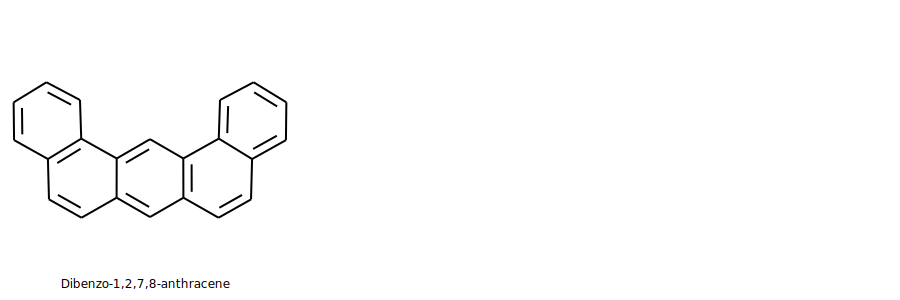

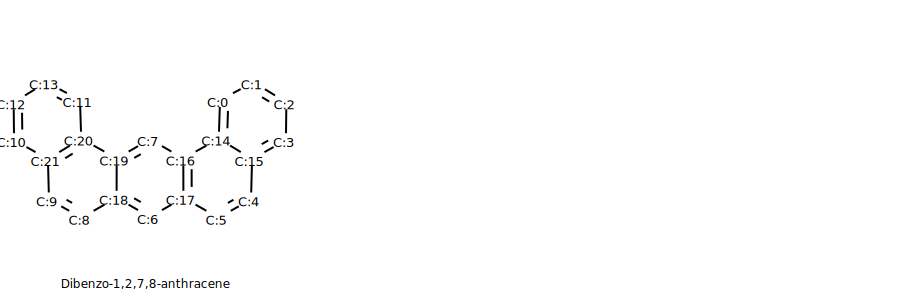

 0  -1   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0  
-1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  
 0   0   0   0   0  -1   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  
 0   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0  -1   0   0  
 0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0  -1   0   0   0  
 0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   

In [4]:
####legend is a list of molecule names
molecule_names = legend 
print(molecule_names)

####lets collect all huckel matrices in a single list
connectivity_matrices = []
for m in molecule_data:
    connectivity_matrices.append(m['conmat']) #use this list to access the huckel matrices for all your molecules
    

#Show molecule and huckel matrix for the 4th molecule n=3
n=3 # python counts from 0

####The list 'mols' defined above contains the visualisation objects, which you can use as follows
draw_molecule(mols[n], legend=molecule_names[n])
#with indices
draw_molecule(mol_with_atom_index(mols[n]), legend=molecule_names[n])

#fancy printing of huckel matrices
matprint(connectivity_matrices[n])

## Assignment Part 1: Stability

<div class="alert alert-block alert-info">
    
### Task 1:
Write a function that uses the 'shmo' module to calculate the total energy **per electron** (TEPE) for a given molecule.
    
</div>

In [5]:
def calculate_tepe(matrix):
    """
    This function calculates the total energy per electron in a molecule.
    It should take the huckel matrix of the molecule as input.
    """
    solver = shmo.HuckelSolver(matrix)

    total_energy=0
    for energy, coeffs, occupation in solver.populated_levels:
            #MO energy level times occupation
            total_energy += energy*occupation/solver.num_electrons
           


   

    return total_energy



I inserted the matrix input into huckle solver by shmo and named it solver and will be used to solve the PAH matrix for energy. I then made a loop which would sum up all the energies*occupation from all energy levels calculated from the matrix then divided by the number of electrons to make it total energy per electron. 

The following cell is read-only and, when executed, will fail if your function does not work

In [6]:
#read-only cell, do not delete

#del huckel_matrix
#del test_matrix
mol, rdkit_mol = select_molecule('Indeno[1,2,3-cd]pyrene')
test_matrix = mol['conmat']
assert(np.abs(calculate_tepe(test_matrix)-(-31.3318585628/22.0))<0.001 )

mol, rdkit_mol = select_molecule('8,9-Benzofluoranthene')
test_matrix2 = mol['conmat']
assert(np.abs(calculate_tepe(test_matrix2)-(-1.4093147401100001))<0.001 )

#Benzene test
mol, rdkit_mol = select_molecule('Benzene')
hueckel_matrix1 = mol['conmat']
assert(np.abs(calculate_tepe(hueckel_matrix1)-(-8.0/6.0))<0.001)

<div class="alert alert-block alert-info">
    
### Task 2: 
* Calculate TEPE for your list of 20 molecules. 
* Identify the most stable and least stable molecules. (**Do not do this manually. Write code that identifies these molecules**)
* Plot the molecule names on the x axis and the energies on the y axis.

</div>

(-1.396620042927273, 'Benzo[a]naphthacene') least stable
(-1.4280196081090908, 'Dibenzo[b,mno]fluoranthene') most stable


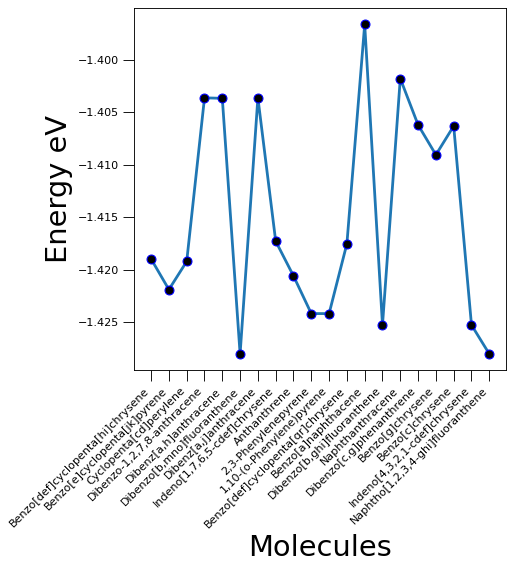

In [7]:
#YOUR CODE HERE
TEPE=np.zeros(20)
c=0
for i in connectivity_matrices:
    TEPE[c]=calculate_tepe(i)
    c=c+1

x=[]
l=0
for j in TEPE:
    z=j,legend[l]
    l=l+1
    x.append(z)




print(max(x),'least stable')
print(min(x),'most stable')
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Molecules', fontsize=26)
plt.ylabel('Energy eV', fontsize=26)
plt.plot(legend,TEPE,'o', linestyle='solid',markerfacecolor='black', markersize=8, markeredgecolor='blue', 
         linewidth=2.5,)

## Write down the indices and names of the most stable and the least stable molecule in the next cell.


most stable is Dibenzo[b,mno]fluoranthene at -1.4280196081090908 eV 
least stable is Benzo[a]naphthacene at -1.396620042927273 eV

For part 1 i just looped through all the all the matrices through the TEPE function and appended it into a array. I then created a new list which had the names of the molecules next to the TEPE so i can identify them. I did this with a loop to place all the names from legend next to the TEPE. I could then print the min and max TEPE with the names next to them which are the most stable and least stable, the more negative number here is the more stable due to it being lower  in energy. I then plotted the legend against the TEPE for a graph.

In [8]:
#read only cell

<div class="alert alert-block alert-info">
    
### Task 3: 
* In cell 1, write a function that determines if a molecule is alternant.
* The same function should also print the number of nonbonding orbitals that you expect (orbitals with energy '0')
* In cell 2, identify which of your 20 molecules are alternant and compare with the total energy (per electron). Answer the questions below.

Hint: There are many ways how to solve this. Trying to calculate the number of starred and unstarred carbons is  hard but not impossible. An easier path could be to think about the properties that define alternant molecules, for example what is special about the eigenvalues of alternant molecules.
</div>


In [9]:


def is_molecule_alternant(matrix):
    """
    This function determines if a molecule is alternant or not
    """
    solver = shmo.HuckelSolver(matrix)
    energylev=[]
    states = solver.populated_levels
    for state in states:
        energy = state[0]
        energylev.append(energy)
    n_nonbonding=0
    
    
    if energylev[0]==-energylev[-1]:
        is_alternant=True
        n_nonbonding=energylev.count(0)
       
       
    if energylev[0]!=-energylev[-1]:
        is_alternant=False
        n_nonbonding=energylev.count(0)
        
        

    return is_alternant, n_nonbonding, 
   # YOUR CODE HERE
        
    #is_alternant is a logical variable. It can either be True or False
    #is_alternant = True means that the molecule is alternant
    
    #n_nonbonding is the number of nonbonding orbitals in the system

Alternate molecules have symmetrical energy levels around 0 so i based my code around this. Using a loop i created a list of the energy levels calculated from the shmo solver.  I then made rules saying that the out put would be true if the last number was a negative of the first number and false if not. 
in both cases it would also return the number of nonbonding orbitals which was the sum of all of the indexes in the list which were = 0.

In [10]:
mol, rdkit_mol = select_molecule('Benzene')
test_matrix = mol['conmat']
is_alternant, n_nonbonding = is_molecule_alternant(test_matrix)
assert(is_alternant)
assert(n_nonbonding==0)

mol, rdkit_mol = select_molecule('8,9-Benzofluoranthene')
is_alternant, n_nonbonding = is_molecule_alternant(mol['conmat'])
assert(not is_alternant)
assert(n_nonbonding==0)
mol, rdkit_mol = select_molecule('Coronene')
is_alternant, n_nonbonding = is_molecule_alternant(mol['conmat'])
assert(is_alternant)
assert(n_nonbonding==0)

In [11]:
#calculate which molecules are alternant and compare against total energy and HLGAP
lis_of_alt=[]

for k in connectivity_matrices:
    a= is_molecule_alternant(k)
    lis_of_alt.append(a)
    

HLGAP=[] 
for t in connectivity_matrices:
    solver = shmo.HuckelSolver(t)
    energylevel= solver.energies
    GAP=-energylevel[10]+energylevel[11]
    HLGAP.append(GAP)
    

c=0   
for n in x:
    print(x[c],lis_of_alt[c],HLGAP[c])
    c=c+1

(-1.4189712315272727, 'Benzo[def]cyclopenta[hi]chrysene') (False, 0) 0.6205794317
(-1.4218833316454544, 'Benzo[e]cyclopenta[jk]pyrene') (False, 0) 0.8325478588999999
(-1.4192056991636361, 'Cyclopenta[cd]perylene') (False, 0) 0.6561296651999999
(-1.4036125140090905, 'Dibenzo-1,2,7,8-anthracene') (True, 0) 0.9834997288
(-1.403659509927273, 'Dibenz[a,h]anthracene') (True, 0) 0.9469957896
(-1.4280196081090908, 'Dibenzo[b,mno]fluoranthene') (False, 0) 0.9750233831
(-1.4036125140090905, 'Dibenz[a,j]anthracene') (True, 0) 0.9834997288
(-1.4172783248818186, 'Indeno[1,7,6,5-cdef]chrysene') (False, 0) 0.6664980989
(-1.4205855796272726, 'Anthanthrene') (True, 0) 0.5819181844
(-1.4241753892181819, '2,3-Phenylenepyrene') (False, 0) 0.7679216991
(-1.4241753892181819, '1,10-(o-Phenylene)pyrene') (False, 0) 0.7679216991
(-1.4175214506909093, 'Benzo[def]cyclopenta[qr]chrysene') (False, 0) 0.6771106592
(-1.396620042927273, 'Benzo[a]naphthacene') (True, 0) 0.6541034272
(-1.425262693490909, 'Dibenzo[b,ghi

To find if my molecules were alternate i just looped through all my matrices through the function and appended them into a list.I then found the homo lumo gap by calculating the energies of each matrix using a loop then finding the gap between the 11th and 12th number as all of the molecules have 22 sp2 carbons so there for 22 energy levels and 11 will be occupied so 11th and 12th will be the gap. I then printed x which is the TEPE per electron along with the name of the PAH along with whether its alternant or not and its non bonding orbitlas and its HLGAP of wach matrix using a loop.

### Answer following questions:
1. Do you see a correlation between alternance and total energy? What did you expect?
2. Notice how you didn't find a PAH with non-bonded orbitals? Do you know why?


1)Alternate compounds are higher in energy than non alternate by around 0.02 eV, alternate compounds are all around 1.40eV and non alternate are around 1.42eV. I expected non alternate to be higher in energy due to non-alternate compunds being less stable and reactive. The altenrate molecules tend to have a higher HLGAP on average but there are some anamolies.

2) Non  bonding orbitals in PAH are equal to the difference in stared and unstared carbons. In each case there is 11 stared and therefore 11 unstared to make 22 carbons so they will cancel to make 0 each time.


## Assignment Part 2: Reactivity




In [12]:
#function for net charges (charge populations - atomic charge)
def calculate_charges(matrix):
    """
    Function which calculates all atomic partal charges for a given molecule
    """
    solver = shmo.HuckelSolver(matrix)
    net_charges = solver.net_charges
    
    return net_charges

<div class="alert alert-block alert-info">
    
### Task 4: 
1. Write a function that determines which atom of a molecule is most likely to be attacked by an electrophile or a nucleophile.
    * The function needs to consider if the molecule is alternant or not. If the molecule is alternant, the function should return -1 for the atom index and -1 for the charge.
    * The function should have two different 'runmodes', one for electrophile and one for nucleophile.


2. Determine which of your molecules is most likely to be attacked by an electrophile?
3. Determine which of your molecules is most likely to be attacked by a nucleophile?

Hints: You can compare reactivity across molecules by identifying which molecules contain the atom with the highest or lowest net charge. (Only consider non-alternant molecules for points 2 and 3.)
</div>


In [13]:
c=0
b=[]
for i in lis_of_alt:
    a=lis_of_alt[c],legend[c],TEPE[c]
    b.append(a)
    c=c+1
b.sort()
print(b)



[((False, 0), '1,10-(o-Phenylene)pyrene', -1.4241753892181819), ((False, 0), '2,3-Phenylenepyrene', -1.4241753892181819), ((False, 0), 'Benzo[def]cyclopenta[hi]chrysene', -1.4189712315272727), ((False, 0), 'Benzo[def]cyclopenta[qr]chrysene', -1.4175214506909093), ((False, 0), 'Benzo[e]cyclopenta[jk]pyrene', -1.4218833316454544), ((False, 0), 'Cyclopenta[cd]perylene', -1.4192056991636361), ((False, 0), 'Dibenzo[b,ghi]fluoranthene', -1.425262693490909), ((False, 0), 'Dibenzo[b,mno]fluoranthene', -1.4280196081090908), ((False, 0), 'Indeno[1,7,6,5-cdef]chrysene', -1.4172783248818186), ((False, 0), 'Indeno[4,3,2,1-cdef]chrysene', -1.425262693490909), ((False, 0), 'Naphtho[1,2,3,4-ghi]fluoranthene', -1.4280196081090908), ((True, 0), 'Anthanthrene', -1.4205855796272726), ((True, 0), 'Benzo[a]naphthacene', -1.396620042927273), ((True, 0), 'Benzo[c]chrysene', -1.4062991482818181), ((True, 0), 'Benzo[g]chrysene', -1.4090448066454544), ((True, 0), 'Dibenz[a,h]anthracene', -1.403659509927273), ((T

I had trouble using the is_alternant function in my reactivity function. It kept either working for the non-alternant PAH's and returning the charge and index correctly but then not working for alternant and not returning -1,-1 or it working for the alternant but not for non-alternate. I used if is_altenant==true: then index==-1 value==-1, then I did if is_alternant== false and then added the calcualtions u can see below for E and N. This didnt work for me so I used the TEPE to my advantage and printed them out in order to see when they stop being nonaltenant. - 1.4205855796272726 is the number for the first alternant molecule so anything above that is seen as nonalternant and is what i used as my IF statement and it worked. As shown from step 3 the TEPE correlates with whether a molecule is alternant or not and is lower for non-alternant moleucles.


In [112]:

def reactivity(matrix, runmode='N'):
    """
    This function determines which atom is most likely to be attacked for a given huckel matrix.
    
    The function has two different 'runmode' settings.
    'N' : Nucleophile is attacking (default)
    'E' : Electrophile is attacking
    
    The function should return the atom index which is most likely to be attacked (index) 
    and its charge value (value).
    
    In the case of alternant molecules, simply return -1 for atom index and -1 for the value
    """        
    if calculate_tepe(matrix)>-1.4205855796272726:
        if runmode=='E':
                    netcharges=calculate_charges(matrix)
                    list_charges=[]
                    for i in netcharges:
                        list_charges.append(i)
                    value=min(list_charges)
                    index=list_charges.index(value)

        if runmode=='N':
                    netcharges1=calculate_charges(matrix)
                    list_charges1=[]
                    for j in netcharges1:
                        list_charges1.append(j)
                    value=max(list_charges1)
                    index=list_charges1.index(value)
    else:
        index=-1
        value=-1
           
        
    
    # YOUR CODE HERE
    #function returns atom index and value of net charge or bond number
    return index, value


The first if statement is to filter out any alternant molecules as they will have a uniformally distributed charge so no electro or nucleophiles will attack any carbons. For the E setting i calculated the charges using the function calculate_charges. Then i appended them into a list using a loop and found the the min which will be the most negative charged carbon which is most likely to be attacked by a electrophile. I did the same for the N setting but used the max number of the list for the most positive carbon for a nucleophile to attack. In both cases I used the index command to find out which carbon it belonged to.
finally i put an else: so that alternate molecules returned with -1,-1 as a way of saying it wont be attacked by either.

In [113]:
#read only
mol, rdkit_mol = select_molecule('Benzo[a]cyclopenta[hi]naphthacene')
test_matrix = mol['conmat']
nuc_index, q_nuc = reactivity(test_matrix,runmode='N')
el_index, q_el = reactivity(test_matrix,runmode='E')

#print(nuc_index, q_nuc)
#print(el_index, q_el)

assert(nuc_index==15)
assert(el_index==3)
assert(q_nuc<0.128 and q_nuc>0.127)
assert(q_el<-0.104 and q_el>-0.105)

mol, rdkit_mol = select_molecule('8,9-Benzofluoranthene')
test_matrix = mol['conmat']

nuc_index, q_nuc = reactivity(test_matrix,runmode='N')
el_index, q_el = reactivity(test_matrix,runmode='E')

assert(nuc_index==0 or nuc_index==1)
assert(el_index==19)
assert(q_nuc<0.04 and q_nuc>0.03)
assert(q_el<-0.04 and q_el>-0.05)


mol, rdkit_mol = select_molecule('Coronene')
test_matrix = mol['conmat']
nuc_index, q_nuc = reactivity(test_matrix,runmode='N')
el_index, q_el = reactivity(test_matrix,runmode='E')

assert(nuc_index == -1)
assert(el_index  == -1)
assert(q_nuc== -1)
assert(q_el == -1)


In [16]:
#read only cell

In [114]:
##free code boxes for points 2 to 3
listofa=[]
for i in connectivity_matrices:
    a= reactivity (i , 'N')
    listofa.append(a)

print(max(listofa),legend[listofa.index(max(listofa))],'most likely to be attacked by a nucleophile')



(18, 0.15193159683949753) Indeno[1,7,6,5-cdef]chrysene most likely to be attacked by a nucleophile


I made a list of all the carbons that were most likely to be attacked by a nucleophile by using a loop then found the max which would be the most positive carbon out of all the molecules so it would be the molecule most likely to be attacked by a nucleophile out of all 20. 
I then found its index in the list and used it for the legend to find the name of the PAH.

In [111]:
listofa=[]
for i in connectivity_matrices:
    a=reactivity (i,'E')
    listofa.append(a)
for i in range(len(listofa)):
    if listofa[i]==(-1,-1):
        listofa[i]=(0,0)
print(max(listofa),legend[listofa.index(max(listofa))],'most likely to be attacked by a electrophile')


(19, -0.08878927406762305) Benzo[def]cyclopenta[qr]chrysene most likely to be attacked by a electrophile


I again made a list of all the carbons most likely to be attacked by an electrophile, however the -1,-1 in the list made it difficult to find the most negativily charged nonalternant carbon as when max is used on it -1,-1 prints. so i had to make a loop with an if statement which replaced (-1,-1) for (0,0) so i could then use max() on the list to get the most negative carbon out of all the PAH's which is the molecule that is most likely to be attacked by a electrophile.
Then i finally printed it along with its index in the legend to get the name of the PAH